### Neste notebook o objetivo é avaliar o campeonato brasileiro e ver se o mesmo é realmente o campeonato mais difícil/disputado, do mundo como afirmado por alguns treinados e comentaristas esportivos. Está é uma visão do futebol brasileiro a partir dos dados. 

In [54]:
import statistics
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

In [46]:
df = pd.read_table("Dados/2003_2018.csv", sep='\t')

Text(0.5, 1.0, 'Mudança de ranking do Campeonato Brasileiro entre 2003-2018')

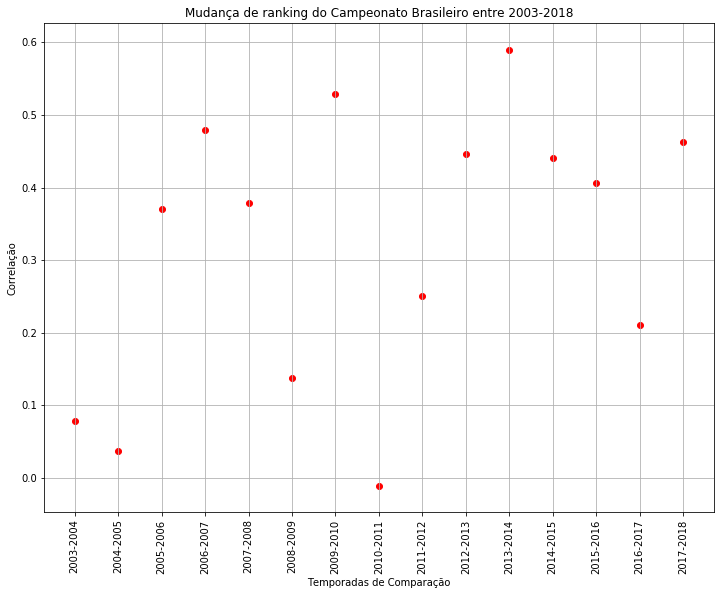

In [64]:
inicial, final = 2003, 2019
rankings = []

# Transformando o nome dos clubes em números
# para depois fazer a correlação de Sperman
dict_clubes = {index : clube for index, clube in enumerate(df['Clube'])}
df['Clube'] = [i for i in range(0, len(df['Clube']))]

for ano in range(inicial, final):
    # selecionando Clubes cuja pontuação é diferente de - e ordeno pelo número de pontos
    df_ano = df[['Clube', str(ano)]][df[str(ano)] != '-']
    # Transformando a pontuação em int
    df_ano[str(ano)] = list(map(lambda x: int(x), df_ano[str(ano)]))
    # Ordenando pelo número de pontos e pegando apenas o ranking de clubes
    clubes = df_ano.sort_values(by=str(ano), axis=0, ascending=False)['Clube']
    rankings.append(clubes)

# colocando todos os rankings com 20 times apenas
rankings = list(map(lambda x: x[:20], rankings))
corr = []
for index in range(1, final-inicial):
    # Calculando a correlação entre os rankings
    corr.append(stats.spearmanr(rankings[index], rankings[index-1])[0])

labels = [str(ano) + '-' + str(ano+1) for ano in range(inicial, final-1)]

fig = plt.figure(figsize=(12, 9))
plt.scatter(labels, corr, color='red')
plt.grid(True)
plt.xticks(rotation=90)
plt.xlabel("Temporadas de Comparação")
plt.ylabel("Correlação")
plt.title("Mudança de ranking do Campeonato Brasileiro entre 2003-2018")